#####Convolutional neural network for image classification

###Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
#import cv2.imshow
tf.__version__

'2.15.0'

###Loading the images

In [2]:
path = 'Computer_Vision_Masterclass_files\Datasets\homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

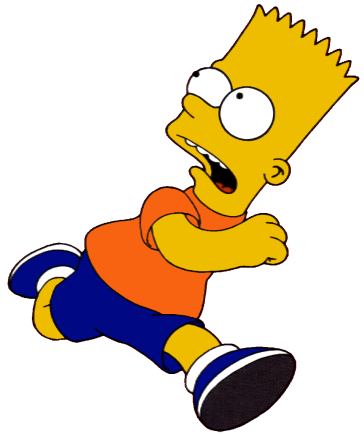

In [3]:
tf.keras.preprocessing.image.load_img('homer_bart_2/training_set/bart/bart100.bmp')

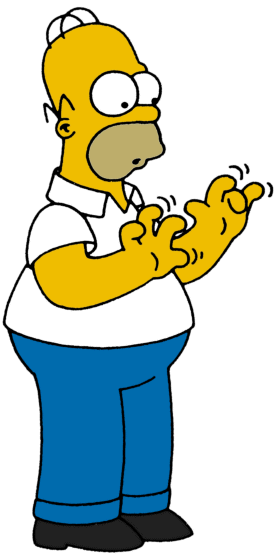

In [4]:
tf.keras.preprocessing.image.load_img('homer_bart_2/training_set/homer/homer100.bmp')

###Train and test set

In [5]:
# We can configure some parameters to make modifications to the original images,
# which is very useful when we have few images of each class.
# As you can see here, there are many other parameters that can be configured.
# Using this function, in addition to the original images, we will also have new images
# with application of these pre-processing
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
# Indicates that the images will be accessed every eight. As we have few images, we put this small value

# As the name suggests, this parameter will mix the images,
# they will be accessed in a completely random order to prevent the neural network
# from memorizing the order of the images. Otherwise, the neural network could
# learn the order of the images and not their features
train_dataset = training_generator.flow_from_directory('homer_bart_2/training_set',
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [8]:
# To test, we set this parameter to FALSE because when testing,
# the order of the images makes no difference.
# If we leave the value equals TRUE, we will not be able to associate the
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('homer_bart_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


###Building and training the neural network

In [9]:
64 * 64

4096

In [10]:
(6272 + 2) / 2

3137.0

In [11]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

In [12]:
14 * 14 * 32

6272

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [14]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)

C:\Users\User\AppData\Local\Temp\ipykernel_24676\4146730526.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)


Epoch 1/50


27/27 [==============================] - 10s 322ms/step - loss: 0.7618 - accuracy: 0.5488 - val_loss: 0.7638 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 9s 314ms/step - loss: 0.6270 - accuracy: 0.6279 - val_loss: 0.5840 - val_accuracy: 0.5926
Epoch 3/50
27/27 [==============================] - 7s 265ms/step - loss: 0.5161 - accuracy: 0.7442 - val_loss: 0.4907 - val_accuracy: 0.7778
Epoch 4/50
27/27 [==============================] - 7s 273ms/step - loss: 0.4720 - accuracy: 0.7767 - val_loss: 0.4082 - val_accuracy: 0.8519
Epoch 5/50
27/27 [==============================] - 8s 314ms/step - loss: 0.4474 - accuracy: 0.8093 - val_loss: 0.7932 - val_accuracy: 0.5926
Epoch 6/50
27/27 [==============================] - 7s 262ms/step - loss: 0.3718 - accuracy: 0.8419 - val_loss: 0.3744 - val_accuracy: 0.8519
Epoch 7/50
27/27 [==============================] - 7s 267ms/step - loss: 0.3568 - accuracy: 0.8372 - val_loss: 0.3541 - val_accuracy: 0.8148
Epo

###Evaluating the neural network

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

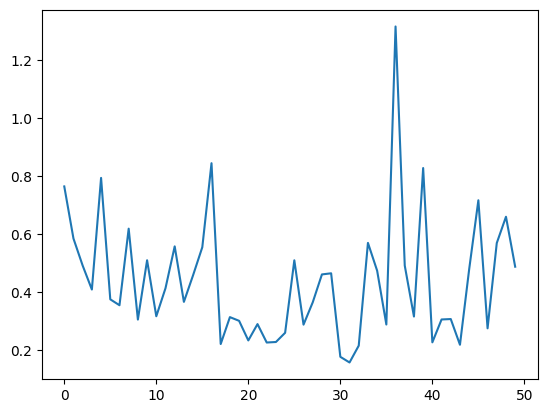

In [17]:
plt.plot(history.history['val_loss']);

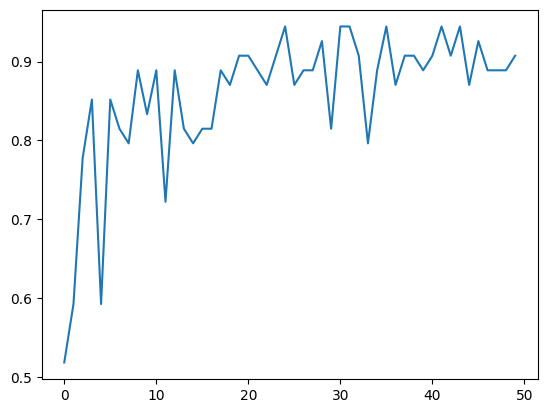

In [18]:
plt.plot(history.history['val_accuracy']);

In [19]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [20]:
predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 1s 9ms/step


array([[1.00000000e+00, 1.62536368e-18],
       [1.00000000e+00, 2.63638307e-19],
       [1.08651770e-02, 9.89134789e-01],
       [1.00000000e+00, 8.29818957e-19],
       [1.00000000e+00, 3.80692775e-15],
       [1.00000000e+00, 2.31563016e-26],
       [1.00000000e+00, 2.60345927e-14],
       [9.99997497e-01, 2.50692074e-06],
       [2.96513662e-02, 9.70348656e-01],
       [9.99441922e-01, 5.58047555e-04],
       [9.99996543e-01, 3.50172945e-06],
       [1.00000000e+00, 6.18414434e-12],
       [8.50524962e-01, 1.49475053e-01],
       [9.98844743e-01, 1.15526002e-03],
       [1.00000000e+00, 4.12876539e-11],
       [1.00000000e+00, 8.06396475e-17],
       [1.06320425e-04, 9.99893665e-01],
       [9.99999881e-01, 1.36829883e-07],
       [9.99807298e-01, 1.92706852e-04],
       [1.00000000e+00, 2.59056398e-19],
       [9.99159575e-01, 8.40436260e-04],
       [1.00000000e+00, 1.09029515e-23],
       [1.00000000e+00, 3.07697201e-10],
       [9.93786030e-04, 9.99006212e-01],
       [1.000000

In [21]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.9074074074074074

In [24]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

<Axes: >

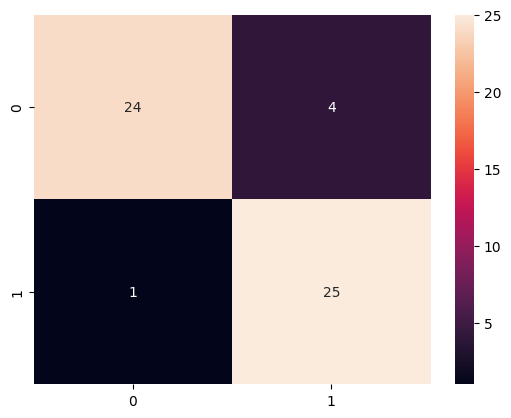

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [26]:
# The neural network can correctly identify 75% of the bart images and when it
# identifies these bart images, it is correct 68% of the time
# We can conclude that this neural network is better for classifying bart images, as
# we saw in the confusion matrix
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.86      0.96      0.91        26

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



###Saving and loading the model

In [27]:
# This step is very important, because when you are satisfied with the results you
# can save the model to use at another time (as the neural network training can take,
# there is no need to train the algori. Assuming you are a consultant to a company,
# you create the neural network and send the weights to the developers to put the
# neural network into production (a graphical interface could be made for example)

In [28]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [29]:
from keras.models import save_model
network_saved = save_model(network, 'weights.hdf5')

C:\Users\User\AppData\Local\Temp\ipykernel_24676\2957579276.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, 'weights.hdf5')


In [30]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bia

In [31]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [32]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

###Classifying one single image

In [33]:
image = cv2.imread('homer_bart_2/test_set/homer/homer15.bmp')

In [34]:

#To Display image
if image is not None:
    # Display the image
    cv2.imshow('image', image)

    # Wait for a key press and close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Unable to read the image.")

In [35]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
image = cv2.resize(image, (64, 64))
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [38]:
image = image / 255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [39]:
image.shape

(64, 64, 3)

In [40]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [41]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[6.676192e-08, 9.999999e-01]], dtype=float32)>

In [42]:
result = np.argmax(result)
result

1

In [43]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [44]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
